<a href="https://colab.research.google.com/github/cadyngo/EAS-Math-for-AI/blob/main/Python_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

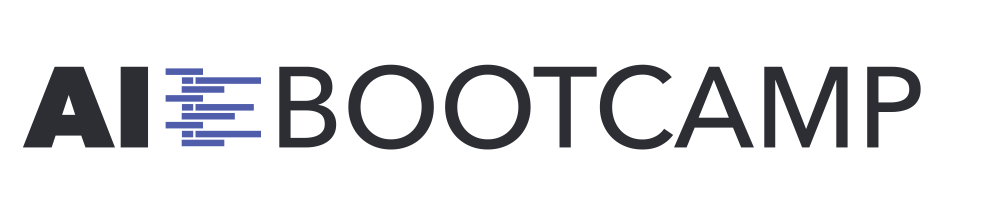

# AI Bootcamp: Getting started
Welcome to the Caltech EAS AI Bootcamp. This notebook reviews Python tools you'll use throughout the bootcamp.
This is running on a Jupyter Notebook within Jupyterlab. If you're using the default setup of the bootcamp, everything is executed in Google's Colab servers and accessed over a browser.

Note that Google Colab runs Debian-based Linux.

***
# Setup

It's good practice to import a package instead of its contents directly, so as you use the package throughout your code it's clear where its contents come from and there are no name conflicts.

For example, if you want to use `array` from package `numpy`:
```python
# Good:
import numpy as np
# ...
np.array([1,2,3]) # It's clear `array` belongs to `np` (numpy)
```
```python
# Not as good
from numpy import array
# ...
array([1,2,3]) # Where was 'array' defined?
```

(Please don't do `from numpy import *` 🤡)

### Import standard Python dependencies
If you have Python, you have these libraries.

In [40]:
import os # Talk to the operating system
import glob # Search for files using wildcards
import pickle as pk # Load and save Python data into files
import time as tm # Timekeeping
import datetime as dt # Timestamps

### Import data science Python dependencies
These libraries are industry-standard and often ship with Python, but not always.

If you're missing one, you can install them from your terminal using the Python package manager `pip` (e.g. `pip install numpy`)

In [41]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install torch

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [42]:
!pip install matplotlib
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [52]:
import numpy as np # Math and vector operations
import pandas as pd # Manage tables of data
import sklearn as sk # Basic data science (not deep learning)
import torch # deep learning

# Plotting:
import matplotlib as mpl # Overarching library for graphics and plots
import matplotlib.pyplot as plt # What you use to actually plot

**In a Jupyter Notebook, use `Shift+Tab` with your typing cursor in the parentheses of a function to lookup its documentation.**

In [44]:
#np.array()
#        ^ Shift+tab here

#### You can see the built-in documentation, including examples, of any Python object by calling `help`

In [54]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        ``__array__`` method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array. If not given, NumPy will try to use
        a default ``dtype`` that can represent the values (by applying promotion
        rules when necessary.)
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if ``__array__`` returns a copy, if obj is a nested
        sequence, or if a copy is needed to satisfy any of the other
        requirements (``dtype``, ``order``, e

***
# High-resolution plots and embedded LaTeX
Make it look like you know what you're doing by configuring the default behavior of `matplotlib` to look nice. Do this by using the `rc` function of `matplotlib` and by installing and activating embedded LaTeX.

**Tip:** Execute terminal code from Jupyter cells by using the `!` character. See how this is done in the cell below to install LaTeX.

In [46]:
# Here's an example in which we mix Python variables
hello = "This is a Python string, read by a shell command"

!echo $hello
!echo "Linux working directory: $(pwd)"

This is a Python string, read by a shell command
Linux working directory: /Users/cadyngo/EAS-Math-for-AI


In [47]:
!apt install -qq -o=Dpkg::Use-Pty=0 -y neofetch cm-super texlive-latex-extra dvipng
!neofetch

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

/bin/bash: neofetch: command not found


### Configure `matplotlib`
See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html

Before:

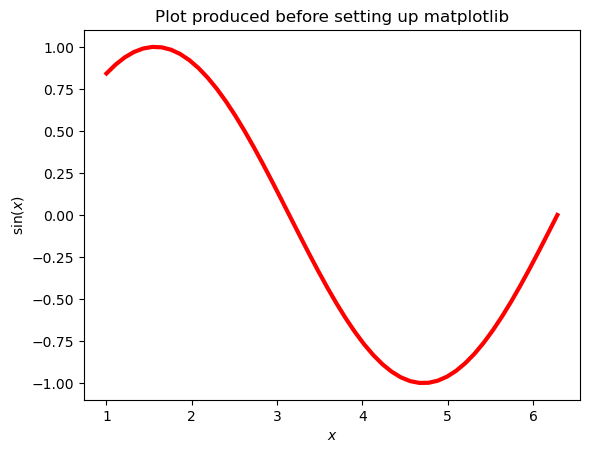

In [48]:
def testPlot(title="Test plot"):
  """
  Dummy plot to test plotting configuration
  """
  fig = plt.figure()
  x = np.linspace(1,np.pi*2)
  plt.plot(x, np.sin(x), lw=3, color='red')
  plt.title(title)
  plt.xlabel("$x$")
  plt.ylabel("$\\sin(x)$")
  return fig

plt.rcdefaults() # Restore defaults so the test makes sense

testPlot("Plot produced before setting up matplotlib");

The `rc` function let's you configure the default behavior of `matplotlib`. The effect is undone when you restart Python.

In [49]:
mpl.rc('figure', dpi=300) # Set higher resolution
mpl.rc('text', usetex=True) # Use latex
mpl.rc('axes', grid='on')
mpl.rc('font', family='serif')
mpl.rc('font', size=12)

**After:**

(Use `plt.savefig` to save the current figure)

In [50]:
fig = testPlot("Plot \\textit{after} "\
          + "configuring \\texttt{matplotlib}")

# Save figure as png file (can also do .jpg, .svg...)
plt.savefig("prettyplot.png")

!ls *.png

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x13394a700> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1920x1440 with 1 Axes>

**All `matplotlib` parameters are stored in the `mpl.rcParams` dictionary.**

In [ ]:
print("Last 10 items of the matplotlib parameter dictionary")
list(mpl.rcParams.keys())[-10:]

Last 10 items of the matplotlib parameter dictionary


['ytick.major.right',
 'ytick.major.size',
 'ytick.major.width',
 'ytick.minor.left',
 'ytick.minor.pad',
 'ytick.minor.right',
 'ytick.minor.size',
 'ytick.minor.visible',
 'ytick.minor.width',
 'ytick.right']

***
# Load data

**More on this in data processing**

In [ ]:
# Basic file I/O (glob, read)
print("Local directory:")
!ls .

print()
filenames = glob.glob("./sample_data/california_housing*.csv")
display(filenames)

# Load table data with pandas
filename = filenames[0]
print("Loading filename: ", filename)
with open(filename, "r") as f:
  df = pd.read_csv(f)
display(df.head())

Local directory:
prettyplot.png	sample_data



['./sample_data/california_housing_test.csv',
 './sample_data/california_housing_train.csv']

Loading filename:  ./sample_data/california_housing_test.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
# Also works with straight filename
display(pd.read_csv(filename))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
# With numpy:
A = np.genfromtxt(filename, delimiter=",")
A

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-1.22050e+02,  3.73700e+01,  2.70000e+01, ...,  6.06000e+02,
         6.60850e+00,  3.44700e+05],
       [-1.18300e+02,  3.42600e+01,  4.30000e+01, ...,  2.77000e+02,
         3.59900e+00,  1.76500e+05],
       ...,
       [-1.19700e+02,  3.63000e+01,  1.00000e+01, ...,  2.20000e+02,
         2.28950e+00,  6.20000e+04],
       [-1.17120e+02,  3.41000e+01,  4.00000e+01, ...,  1.40000e+01,
         3.27080e+00,  1.62500e+05],
       [-1.19630e+02,  3.44200e+01,  4.20000e+01, ...,  2.60000e+02,
         8.56080e+00,  5.00001e+05]])

In [ ]:
A.shape

(3001, 9)

In [ ]:
A[1:]

array([[-1.22050e+02,  3.73700e+01,  2.70000e+01, ...,  6.06000e+02,
         6.60850e+00,  3.44700e+05],
       [-1.18300e+02,  3.42600e+01,  4.30000e+01, ...,  2.77000e+02,
         3.59900e+00,  1.76500e+05],
       [-1.17810e+02,  3.37800e+01,  2.70000e+01, ...,  4.95000e+02,
         5.79340e+00,  2.70500e+05],
       ...,
       [-1.19700e+02,  3.63000e+01,  1.00000e+01, ...,  2.20000e+02,
         2.28950e+00,  6.20000e+04],
       [-1.17120e+02,  3.41000e+01,  4.00000e+01, ...,  1.40000e+01,
         3.27080e+00,  1.62500e+05],
       [-1.19630e+02,  3.44200e+01,  4.20000e+01, ...,  2.60000e+02,
         8.56080e+00,  5.00001e+05]])

***
# Math operations

## NumPy arrays

In [ ]:
u = np.array([1, 2, 3])

print("u:")
display(u)

print()
print("u.T:")
display(u.T)
print()

print("u.shape:")

display(u.shape)

U = np.array([[1,2,3],
              [4,5,6]])
print()
print("U:")
display(U)
print()
print("U.shape")
display(U.shape)
print()
print("U.T:")
display(U.T)
print()
print("U.T.shape:")
display(U.T.shape)

u:


array([1, 2, 3])


u.T:


array([1, 2, 3])


u.shape:


(3,)


U:


array([[1, 2, 3],
       [4, 5, 6]])


U.shape


(2, 3)


U.T:


array([[1, 4],
       [2, 5],
       [3, 6]])


U.T.shape:


(3, 2)

### NumPy array axes and indexing

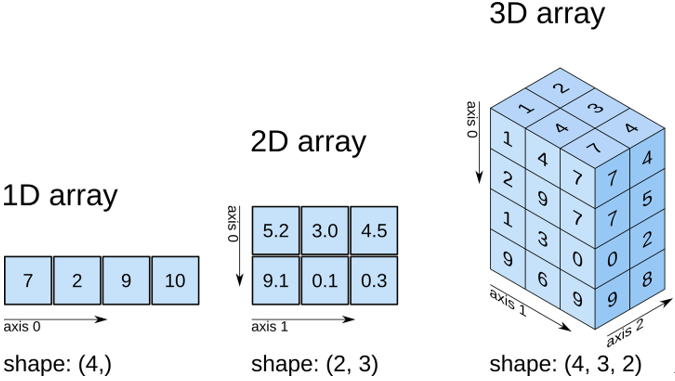

In [ ]:
# Follow the brackets from the outside in. This is the order of the
# indices
# A[i,j,k]
#            First index, i (selects matrices in order 3 tensor)
#            | Second index, j (selects row vectors in matrices)
#            | | Third index, k (selects scalar columns in row v's)
#            | | |
A = np.array([ [ [ 1, 2, 3],
                 [ 4, 5, 6] ],

               [ [ 7, 8, 9],
                 [10,11,12] ], ])

display(A)
display(A.shape)

print("Each index removes a dimension")
print("One index gives a matrix, two indices give vectors")
for i in range(A.shape[0]):
  print("\nA[%d]:"%i)
  display(A[i])

  for j in range(A.shape[1]):
    print("A[%d,%d]:"%(i,j))
    display(A[i,j])

print()
print("Three indices give scalars")
print("A[0,0,0]:", A[0,0,0])
print("A[1,1,2]:", A[1,1,2])

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

(2, 2, 3)

Each index removes a dimension
One index gives a matrix, two indices give vectors

A[0]:


array([[1, 2, 3],
       [4, 5, 6]])

A[0,0]:


array([1, 2, 3])

A[0,1]:


array([4, 5, 6])


A[1]:


array([[ 7,  8,  9],
       [10, 11, 12]])

A[1,0]:


array([7, 8, 9])

A[1,1]:


array([10, 11, 12])


Three indices give scalars
A[0,0,0]: 1
A[1,1,2]: 12


In [ ]:
# Slice all elements (copies array):
display(A[:,:,:])

print()
print("All elements whose second index is 0:")
display(A[:,0])

display(A[1,0,0])

print("")

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])


All elements whose second index is 0:


array([[1, 2, 3],
       [7, 8, 9]])

7

**Array slicing**

In [ ]:
B = np.array([[1,2,3,4],[5,6,7,8]]).T
B

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [ ]:
# All rows of column 0:
B[:,0]

array([1, 2, 3, 4])

In [ ]:
# All rows of column 1:
B[:,1]

array([5, 6, 7, 8])

In [ ]:
# entire row 2
B[2,:]

array([3, 7])

### Aggregate across axes

In [ ]:
A_1 = np.ones(shape=(2,3))
A_1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
A_2 = 2*np.ones(shape=(2,3))
A_2

array([[2., 2., 2.],
       [2., 2., 2.]])

In [ ]:
A = np.stack((A_1,A_2))
A

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.]]])

#### Averaging with `np.mean`:

In [ ]:
# Not specifying an axis aggregates across all axes
np.mean(A)

1.5

In [ ]:
# Outermost axis: get mean 2D matrix
np.mean(A, axis=0)

array([[1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5]])

In [ ]:
# Second axis: get mean row within each matrix
np.mean(A, axis=1)

array([[1., 1., 1.],
       [2., 2., 2.]])

In [ ]:
# Third axis: get mean column within each matrix
np.mean(A, axis=2)

array([[1., 1.],
       [2., 2.]])

### Sums

In [ ]:
np.sum(A)

18.0

In [ ]:
np.sum(A, axis=0)

array([[3., 3., 3.],
       [3., 3., 3.]])

In [ ]:
np.sum(A, axis=1)

array([[2., 2., 2.],
       [4., 4., 4.]])

### Reshaping

Use `np.flatten(A)` to turn an $n$-dimensional array `A` to a flat vector.

Use `np.reshape(A, newshape)` to reshape the array `A` into the given shape `newshape`. `np.reshape` is primarily used to *unflatten* arrays, as demonstrated below.

In [ ]:
A = np.array([[1,2,3],
              [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
A_flat = A.flatten()
A_flat

array([1, 2, 3, 4, 5, 6])

In [ ]:
np.reshape(A, newshape=(2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.reshape(A, newshape=(3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

### Ranges

In [ ]:
# Both np.linspace and np.arange have wherea start and a stop to span a range of
# numbers. In linspace, you specify the number of elements in the range.
# in arange, you specify the step size.

print("np.linspace:")
x_1 = np.linspace(start=0, stop=10, num=20)
display(x_1)

print()

print("np.arange:")
x_2 = np.arange(start=0, stop=10, step=0.5)
display(x_2)

np.linspace:


array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])


np.arange:


array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

### Boolean indexing

Indexing an array by an array of boolean values of the same shape lets you filter its elements.

Produce said arrays of boolean values with Python boolean operations on said arrays.

In [ ]:
A = np.array([[1,2,3], [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

Get only the even elements of an array:

In [ ]:
even_idx = np.mod(A, 2) == 0
even_idx

array([[False,  True, False],
       [ True, False,  True]])

In [ ]:
A[even_idx]

array([2, 4, 6])

In [ ]:
B = np.array([[0,0,0],[4,5,6]])
B

array([[0, 0, 0],
       [4, 5, 6]])

Get only the elements of `A` that are larger than the corresponding elements in `B`:

In [ ]:
A[A > B]

array([1, 2, 3])

### Arithmetic

In [ ]:
v = np.array([1,2,3])
v

array([1, 2, 3])

In [ ]:
2*v

array([2, 4, 6])

In [ ]:
10 + v

array([11, 12, 13])

In [ ]:
u = np.flip(v)
u

array([3, 2, 1])

In [ ]:
w = v + 2*u
w

array([7, 6, 5])

**Products**

Python's `*` operator does element-wise operations:

In [ ]:
print("v:",v)
v*v

v: [1 2 3]


array([1, 4, 9])

Use `@` for dot product, or `np.dot`

In [ ]:
print("v:", v)
print("dot product of v with itself:")
display(v@v)
display(np.dot(v,v))

v: [1 2 3]
dot product of v with itself:


14

14

In [ ]:
print("NumPy vector norm of v:", np.linalg.norm(v))
print()
print("Manually calculated: ", np.sqrt(v@v))

NumPy vector norm of v: 3.7416573867739413

Manually calculated:  3.7416573867739413


In [ ]:
I = 2*np.eye(3,3)
I

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [ ]:
I@v

array([2., 4., 6.])

***
# Visualize data

"Fix" randomness for consistent demonstration by setting the NumPy seed.

In [ ]:
np.random.seed(420)

## Line data

Text(0.5, 0, 'Element index')

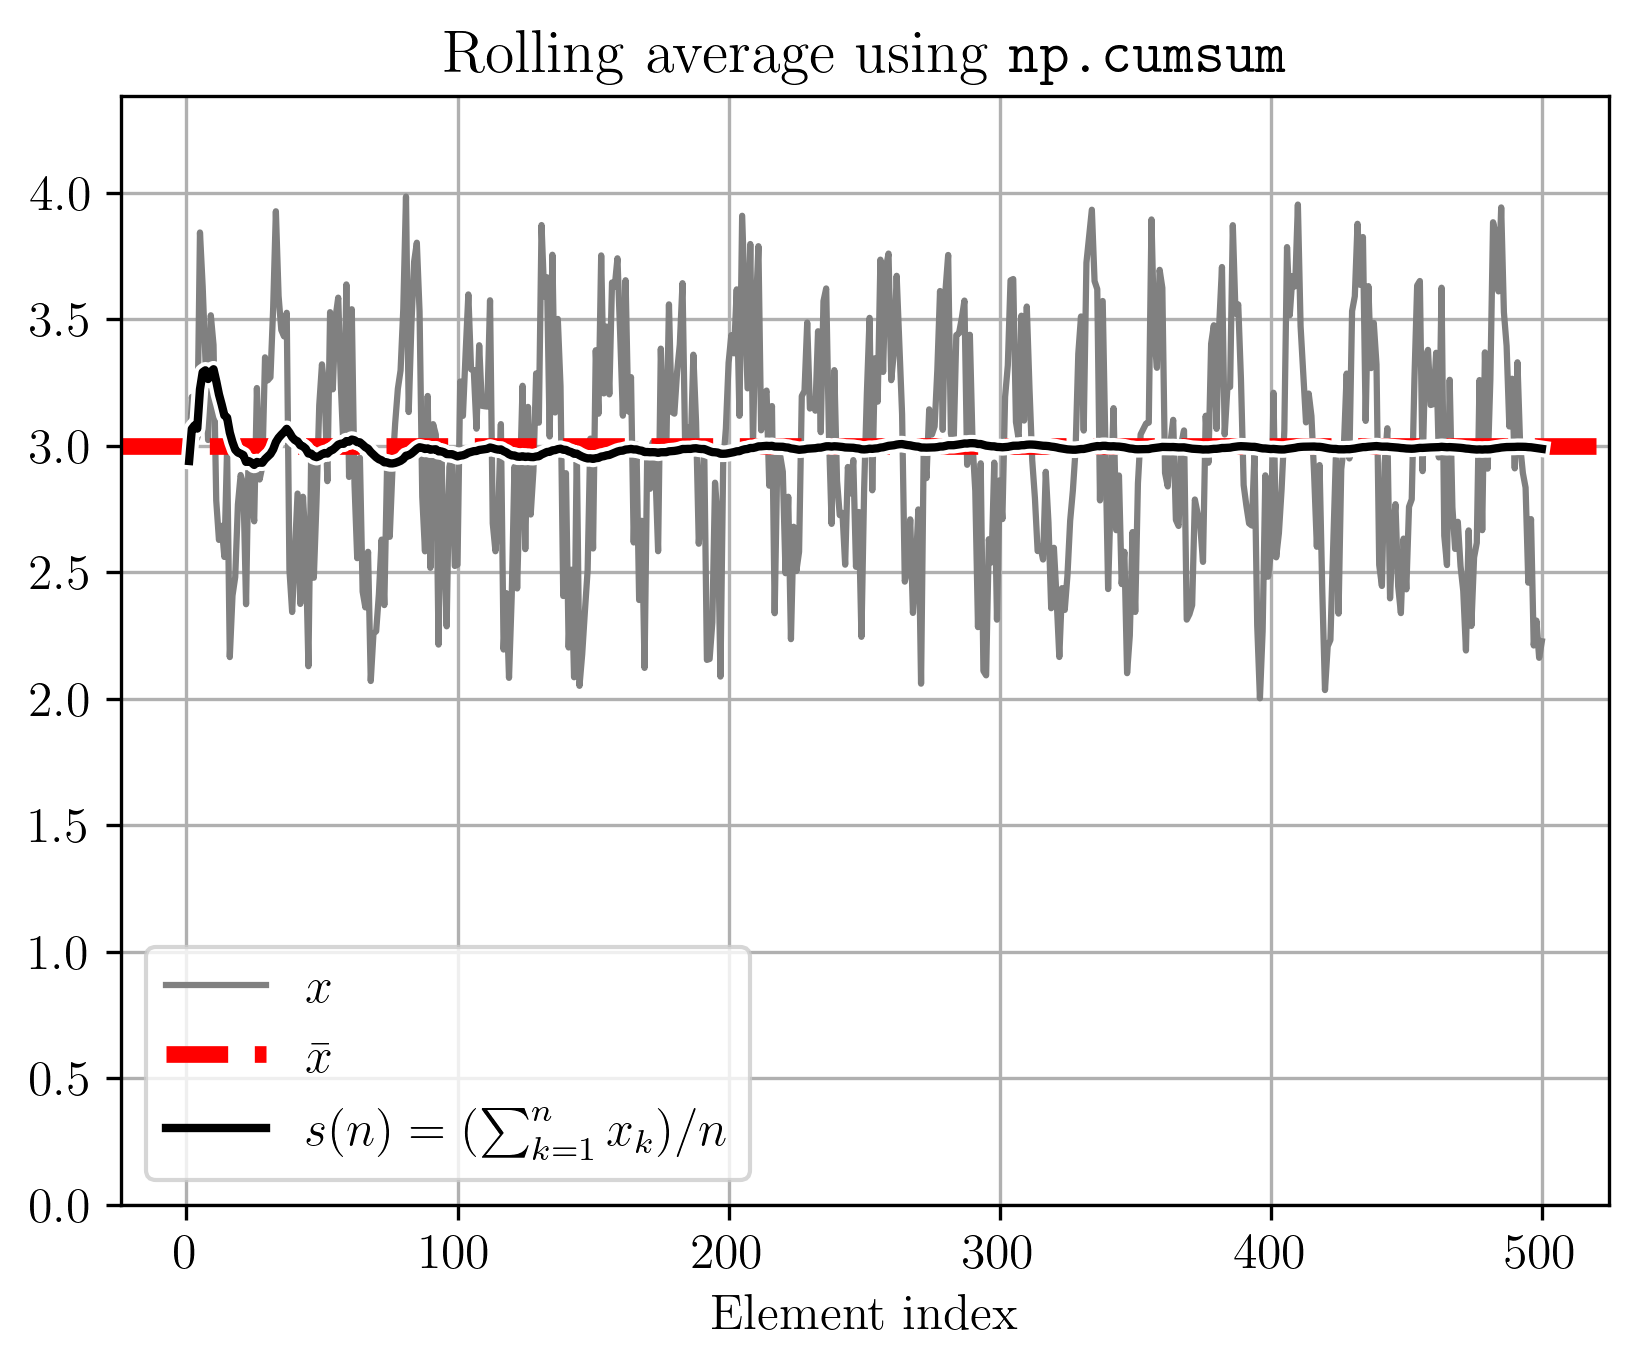

In [ ]:
N = 500

n = np.arange(start=1,stop=N+1)

x_mean = 3
x_noise = (np.random.rand(N)-0.5) + np.sin(n/4)*0.5
x = x_mean + x_noise

x_cumulative = np.cumsum(x)
x_maverage =  x_cumulative/n


fig = plt.figure()

plt.plot(n, x, label="$x$", color="gray")

plt.axhline(x_mean, ls="--", color="red", lw=4,
            label="$\\bar{x}$")

plt.plot(n, x_maverage, lw=4, color="white")
plt.plot(n, x_maverage, lw=2, color="black",
         label="$s(n)=(\\sum_{k=1}^{n} x_k)/n$")

plt.ylim([0, np.max(x)*1.1])

plt.legend()

plt.title("Rolling average using \\texttt{np.cumsum}")
plt.xlabel("Element index")

## 2D Scatterplot

Let's plot data from the DataFrame we loaded earlier

In [ ]:
df.head()  # Shows the first 5 entries in the table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
df['median_income'] # Shows this column of the table

,median_income
0,6.6085
1,3.5990
2,5.7934
3,6.1359
4,2.9375
...,...
2995,1.1790
2996,3.3906
2997,2.2895
2998,3.2708


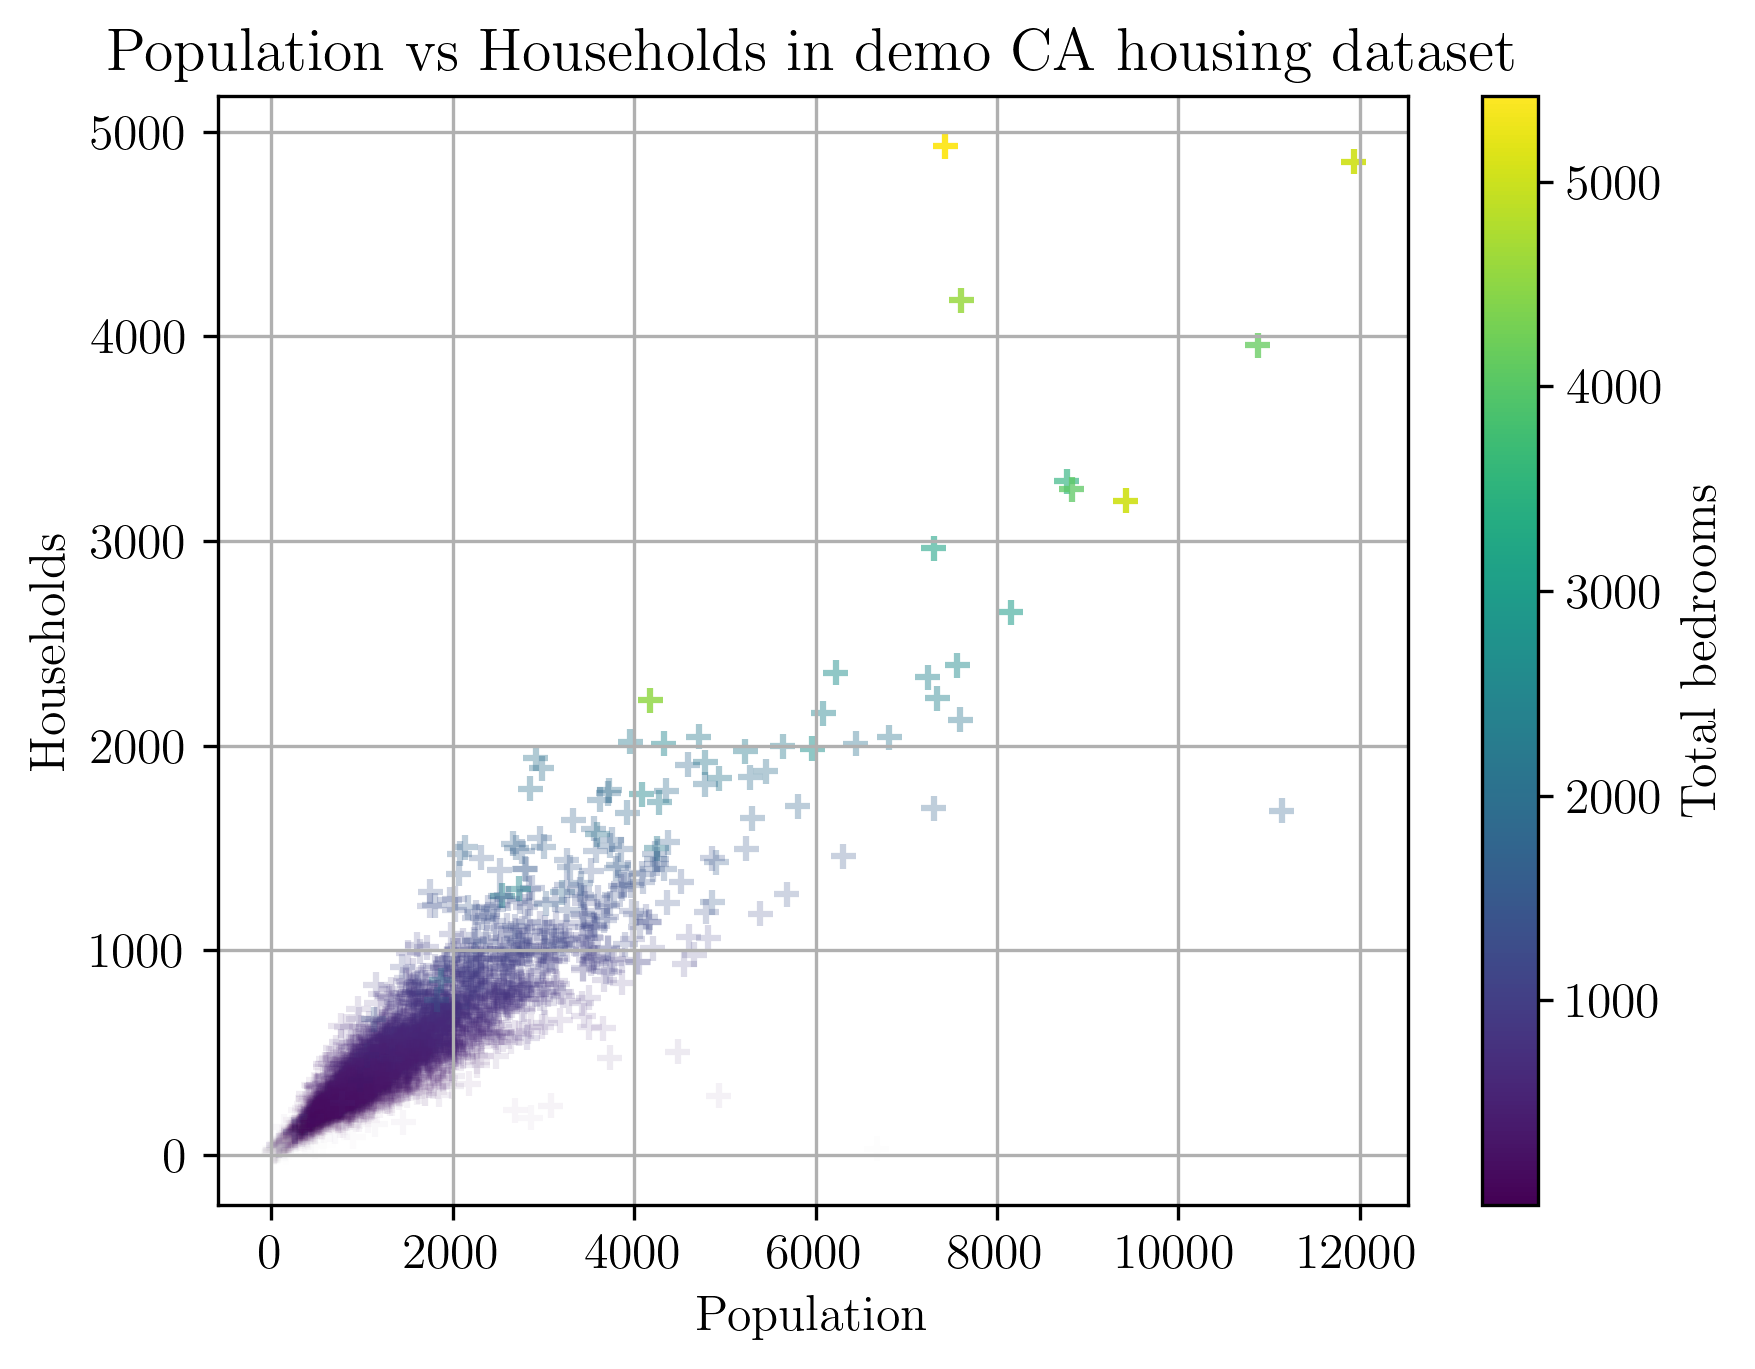

In [ ]:
fig = plt.figure()

plt.scatter(df['population'], df['households'],
            c=df['total_bedrooms'], # color
            alpha=df['total_bedrooms']/df['total_bedrooms'].max(), # opacity
            marker="+") # marker shape
plt.xlabel("Population")
plt.ylabel("Households")
plt.title("Population vs Households in demo CA housing dataset")
plt.colorbar(label="Total bedrooms")

### Visualize matrices

VERY useful for debugging by interpreting patterns in large matrices

In [ ]:
A = np.arange(1,10)
AA = np.outer(A,A)
AA

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

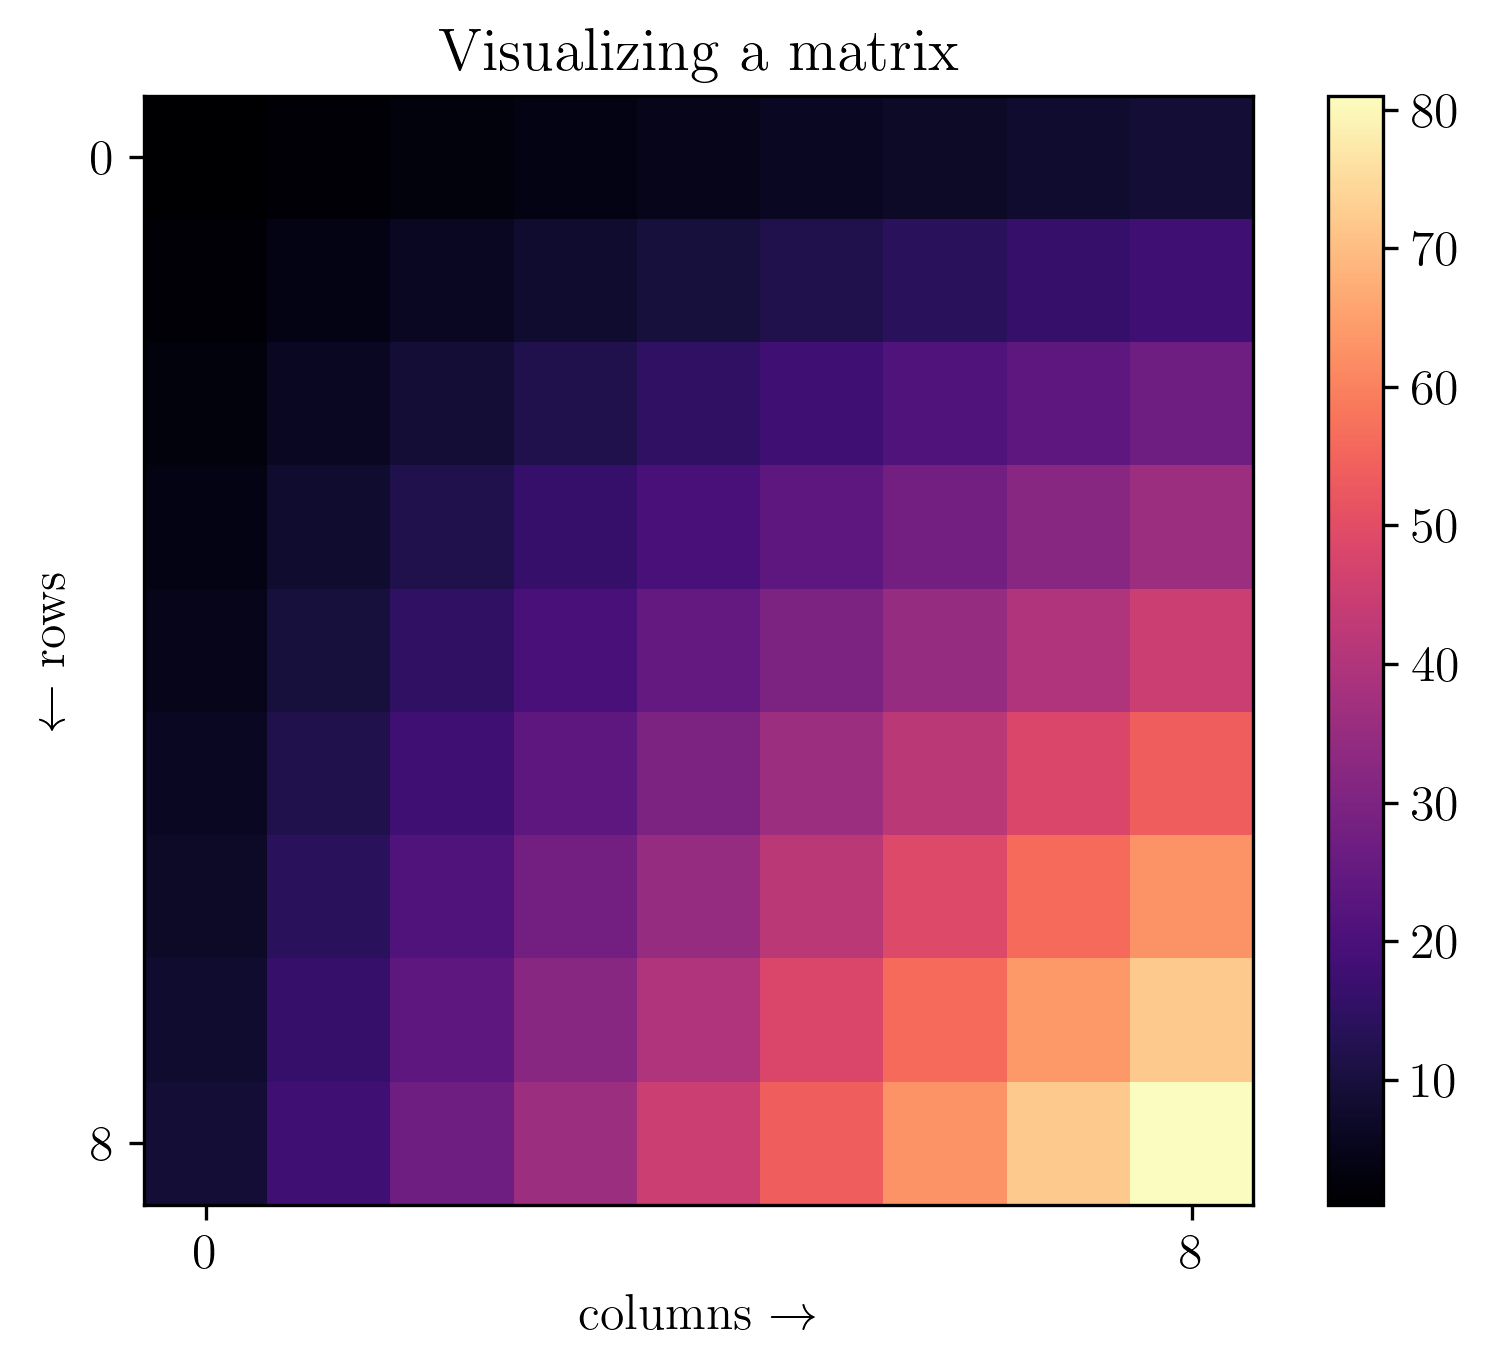

In [ ]:
fig = plt.figure()
plt.imshow(AA, cmap="magma")
plt.grid(False)
plt.xticks([0,AA.shape[0]-1])
plt.yticks([0,AA.shape[1]-1])
plt.xlabel("columns $\\rightarrow$")
plt.ylabel("$\\leftarrow$ rows")
plt.title("Visualizing a matrix")
plt.colorbar()

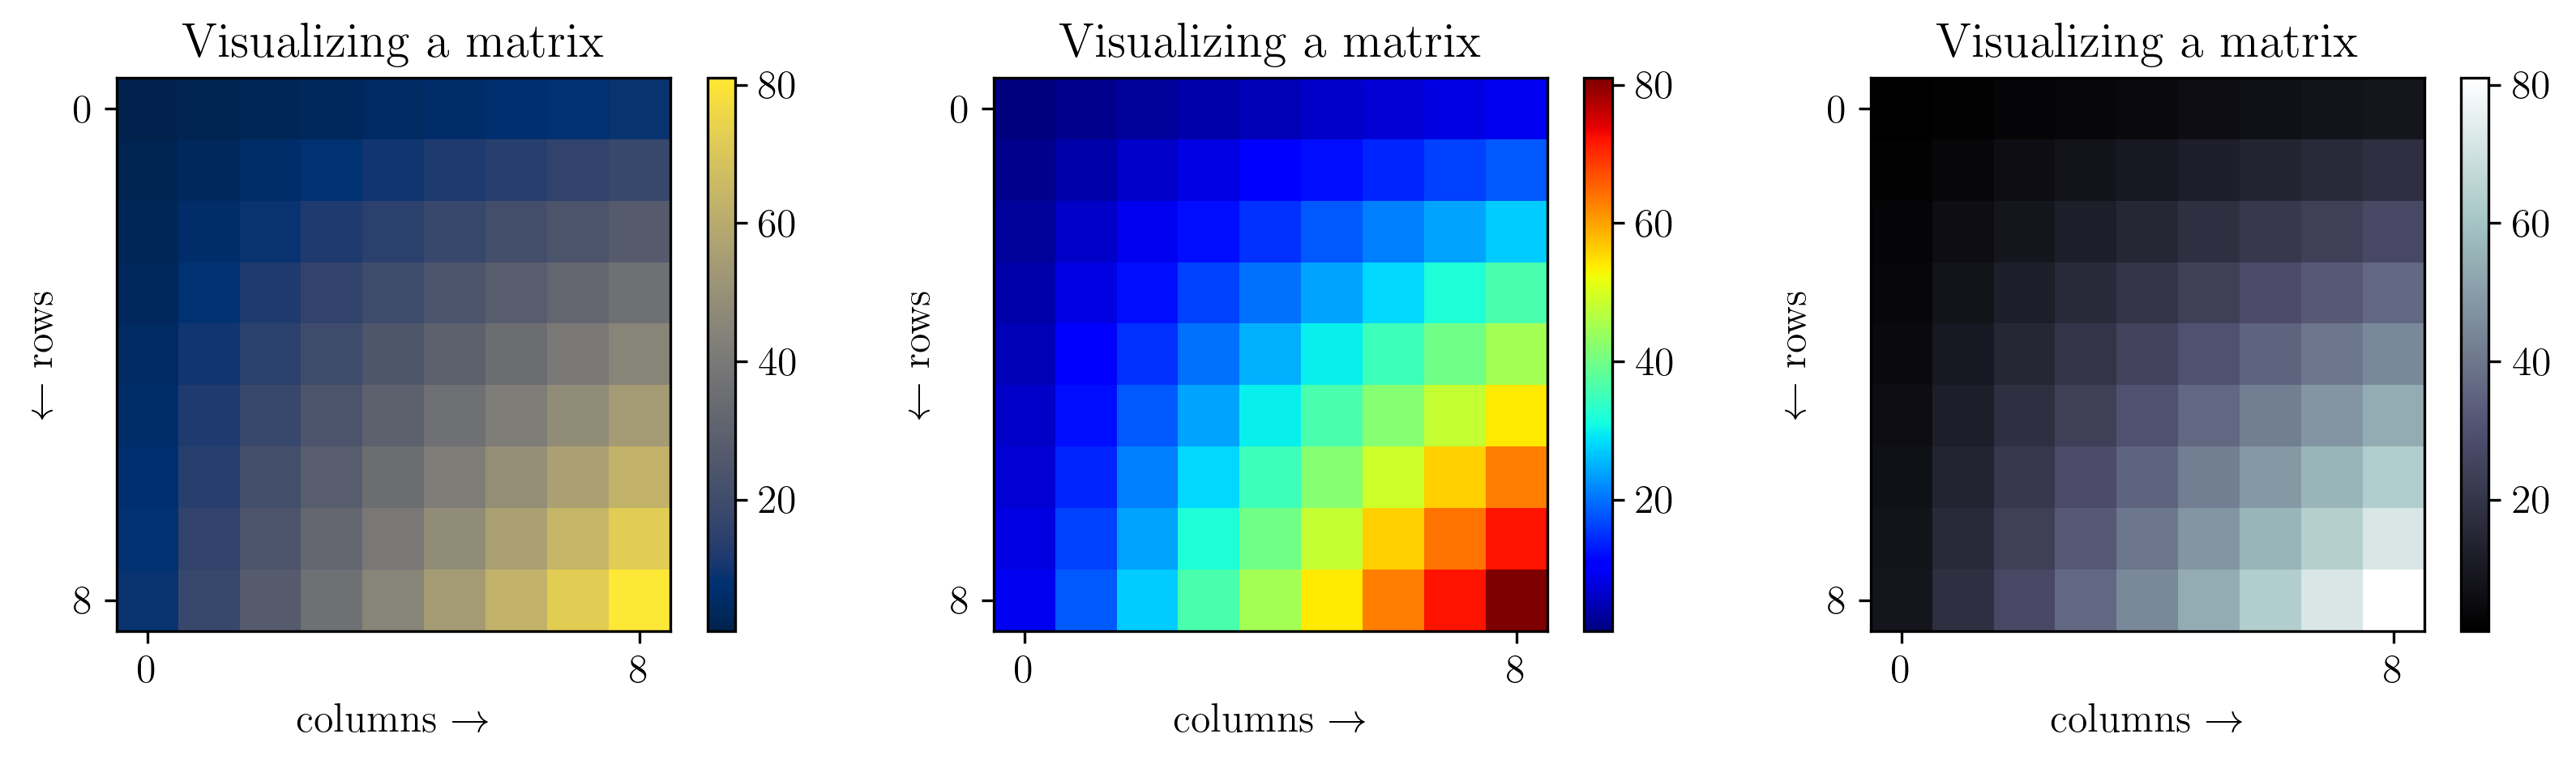

In [ ]:

fig = plt.subplots(nrows=1, ncols=3, figsize=(11,3))

ax = plt.subplot(1,3,1)
plt.imshow(AA, cmap="cividis")
plt.grid(False)
plt.xticks([0,AA.shape[0]-1])
plt.yticks([0,AA.shape[1]-1])
plt.xlabel("columns $\\rightarrow$")
plt.ylabel("$\\leftarrow$ rows")
plt.title("Visualizing a matrix")
plt.colorbar()

ax = plt.subplot(1,3,2)
plt.imshow(AA, cmap="jet")
plt.grid(False)
plt.xticks([0,AA.shape[0]-1])
plt.yticks([0,AA.shape[1]-1])
plt.xlabel("columns $\\rightarrow$")
plt.ylabel("$\\leftarrow$ rows")
plt.title("Visualizing a matrix")
plt.colorbar()

ax = plt.subplot(1,3,3)
plt.imshow(AA, cmap="bone")
plt.grid(False)
plt.xticks([0,AA.shape[0]-1])
plt.yticks([0,AA.shape[1]-1])
plt.xlabel("columns $\\rightarrow$")
plt.ylabel("$\\leftarrow$ rows")
plt.title("Visualizing a matrix")
plt.colorbar()

plt.tight_layout()

### Matplotlib colormaps

See: https://matplotlib.org/stable/gallery/color/colormap_reference.html

Some highlighted colormaps:

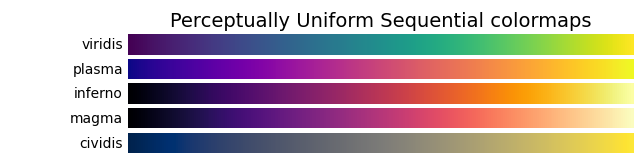

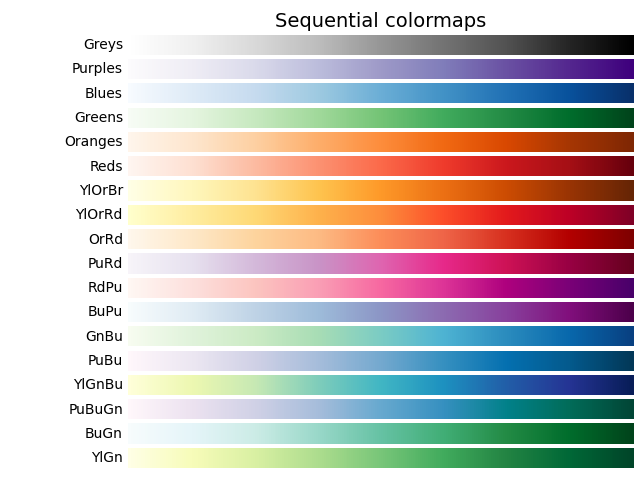